# Airplane Cargo Analysist

**Metadata:**

https://data.sfgov.org/Transportation/Air-Traffic-Cargo-Statistics/u397-j8nr/about_data [san francisco air cargo data]

**Problem case:**
* Evaluate the performance of different airlines based on cargo metrics, identifying top performers and areas for improvement.
* Analyze patterns in different types of cargo activities to understand trends in the industry, such as the prevalence of express shipments or bulk cargo.
* Examine cargo operations over time to identify seasonality, peak periods, or long-term trends in air cargo demand.
* Benchmark the performance of specific airlines, regions, or aircraft types against industry averages to assess competitiveness
* Utilize historical data to build predictive models for future air cargo trends, helping stakeholders make informed decisions.

## Data Wrangling

In [1]:
#import necessary library
import pandas as pd
pd.plotting.register_matplotlib_converters
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from fuzzywuzzy import fuzz,process

#set all things that needed
pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows',200)
# pd.reset_option('display.max_rows')
plt.style.use('dark_background')

df = pd.read_csv('/kaggle/input/air-traffic-cargo-statistic/Air_Traffic_Cargo_Statistics.csv', parse_dates=[1,13,14], date_format='mixed')

In [2]:
# df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54043 entries, 0 to 54042
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Activity Period              54043 non-null  int64         
 1   Activity Period Start Date   54043 non-null  datetime64[ns]
 2   Operating Airline            54043 non-null  object        
 3   Operating Airline IATA Code  53465 non-null  object        
 4   Published Airline            54043 non-null  object        
 5   Published Airline IATA Code  53465 non-null  object        
 6   GEO Summary                  54043 non-null  object        
 7   GEO Region                   54043 non-null  object        
 8   Activity Type Code           54043 non-null  object        
 9   Cargo Type Code              54043 non-null  object        
 10  Cargo Aircraft Type          54043 non-null  object        
 11  Cargo Weight LBS             54043 non-nu

In [3]:
df.head()

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS,Cargo Metric TONS,data_as_of,data_loaded_at
0,199907,1999-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Cargo,Passenger,349048,158.328173,2023-12-20 14:00:06,2023-12-20 16:48:03
1,199907,1999-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Mail,Passenger,122003,55.340561,2023-12-20 14:00:06,2023-12-20 16:48:03
2,199907,1999-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Cargo,Passenger,514450,233.354520,2023-12-20 14:00:06,2023-12-20 16:48:03
3,199907,1999-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Mail,Passenger,89776,40.722394,2023-12-20 14:00:06,2023-12-20 16:48:03
4,199907,1999-07-01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Cargo,Passenger,13086,5.935810,2023-12-20 14:00:06,2023-12-20 16:48:03


In [4]:
#select all columns that we need
df = df[[
#     'Activity Period',
    'Activity Period Start Date',
    'Operating Airline',
#     'Operating Airline IATA Code',
    'Published Airline',
#     'Published Airline IATA Code',
    'GEO Summary',
    'GEO Region',
    'Activity Type Code',
    'Cargo Type Code',
    'Cargo Aircraft Type',
    'Cargo Weight LBS',
    'Cargo Metric TONS',
#     'data_as_of',
#     'data_loaded_at'
]].copy()

df.columns

Index(['Activity Period Start Date', 'Operating Airline', 'Published Airline',
       'GEO Summary', 'GEO Region', 'Activity Type Code', 'Cargo Type Code',
       'Cargo Aircraft Type', 'Cargo Weight LBS', 'Cargo Metric TONS'],
      dtype='object')

In [5]:
#change all columns name
df = df.rename(columns={
    'Activity Period Start Date' : 'activity_period_start_date',
    'Operating Airline' : 'operating_airline',
    'Published Airline' : 'published_airline',
    'GEO Summary' : 'geo_summary',
    'GEO Region' : 'geo_region',
    'Activity Type Code' : 'activity_type_code',
    'Cargo Type Code' : 'cargo_type_code',
    'Cargo Aircraft Type' : 'cargo_aircraft_type',
    'Cargo Weight LBS' : 'cargo_weight_lbs',
    'Cargo Metric TONS' : 'cargo_metric_tons'
})

df

,activity_period_start_date,operating_airline,published_airline,geo_summary,geo_region,activity_type_code,cargo_type_code,cargo_aircraft_type,cargo_weight_lbs,cargo_metric_tons
0,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Cargo,Passenger,349048,158.328173
1,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Mail,Passenger,122003,55.340561
2,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Cargo,Passenger,514450,233.354520
3,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Mail,Passenger,89776,40.722394
4,1999-07-01,Aeroflot Russian International Airlines,Aeroflot Russian International Airlines,International,Europe,Deplaned,Cargo,Passenger,13086,5.935810
...,...,...,...,...,...,...,...,...,...,...
54038,2023-10-01,Vietnam Airlines JSC,Vietnam Airlines JSC,International,Asia,Deplaned,Cargo,Passenger,286532,129.970915
54039,2023-10-01,Vietnam Airlines JSC,Vietnam Airlines JSC,International,Asia,Enplaned,Cargo,Passenger,67673,30.696473
54040,2023-10-01,Virgin Atlantic,Virgin Atlantic,International,Europe,Deplaned,Cargo,Passenger,212137,96.225343
54041,2023-10-01,Virgin Atlantic,Virgin Atlantic,International,Europe,Enplaned,Cargo,Passenger,196029,88.918754


In [6]:
df['operating_airline'].value_counts().sort_index()
# hitungan_awal = df['operating_airline'].value_counts().sort_index()
# len(hitungan_awal)

operating_airline
21 Air, LLC             16
ABX Air                334
ASTAR USA, LLC          16
ATA Airlines           324
Active Aero Charter      2
                      ... 
Virgin America           5
Virgin Atlantic        706
WOW Air                 55
World Airways           36
ZIPAIR Tokyo Inc         5
Name: count, Length: 130, dtype: int64

In [7]:
df['operating_airline'].loc[df['operating_airline'].str.contains(',')].value_counts().index

Index(['All Nippon Company Airways, Ltd.', 'TACA International Airlines, S.A.',
       'Atlas Air, Inc', 'Aer Lingus, Ltd.', 'COPA Airlines, Inc.',
       'Air Transport International, Inc.', 'Atlas Air, Inc. (inactive)',
       'China Eastern Airlines, Inc', 'Emery Worldwide Airlines, Inc.',
       'ASTAR USA, LLC', '21 Air, LLC', 'Air Transport International, LLC.',
       'Total Airport Services, Inc. (Inactive)', 'Norse Atlantic UK, Ltd.'],
      dtype='object', name='operating_airline')

In [8]:
#remove extension from airlines name
def airline_name_cleaner(df):
    dfcopy = df.replace(r'\bInc\b|\bLLC\b|\bLimited\b|\bLtd\b|\binactive\b|\bPre 07/01/2013\b|\bbecame Delta\b|\bLTD\b|\bGmbH\b|\bEHF\b|\bASA\b|\bCO\b|\bJSC\b|\bSPA\b|\bSA\b', '',regex=True).copy()
    dfcopy = dfcopy.replace(r'\([^)]*\)|[-,.]', '', regex=True)
    dfcopy = dfcopy.applymap(lambda x: x.strip() if isinstance(x, str) else x) #remove all white space
    return dfcopy

dfcopy = airline_name_cleaner(df)
dfcopy['operating_airline'].value_counts().sort_index()


operating_airline
21 Air                  16
ABX Air                334
ASTAR USA               16
ATA Airlines           324
Active Aero Charter      2
                      ... 
Virgin America           5
Virgin Atlantic        706
WOW Air                 55
World Airways           36
ZIPAIR Tokyo             5
Name: count, Length: 126, dtype: int64

In [9]:
df.describe()

,activity_period_start_date,cargo_weight_lbs,cargo_metric_tons
count,54043,5.404300e+04,54043.000000
mean,2011-04-10 05:33:47.252372992,5.194877e+05,235.639615
min,1999-07-01 00:00:00,1.000000e+00,0.000454
25%,2005-02-01 00:00:00,1.961600e+04,8.897818
50%,2011-02-01 00:00:00,1.443320e+05,65.468995
75%,2017-07-01 00:00:00,5.918965e+05,268.484252
max,2023-10-01 00:00:00,2.381234e+07,10801.278331
std,NaN,1.015188e+06,460.489304


In [10]:
df.describe(include='object')

,operating_airline,published_airline,geo_summary,geo_region,activity_type_code,cargo_type_code,cargo_aircraft_type
count,54043,54043,54043,54043,54043,54043,54043
unique,130,119,2,9,2,3,3
top,United Airlines,United Airlines,International,Asia,Deplaned,Cargo,Passenger
freq,4758,4766,37735,19012,27630,29954,44391


# Data Visualization

<BarContainer object of 2 artists>

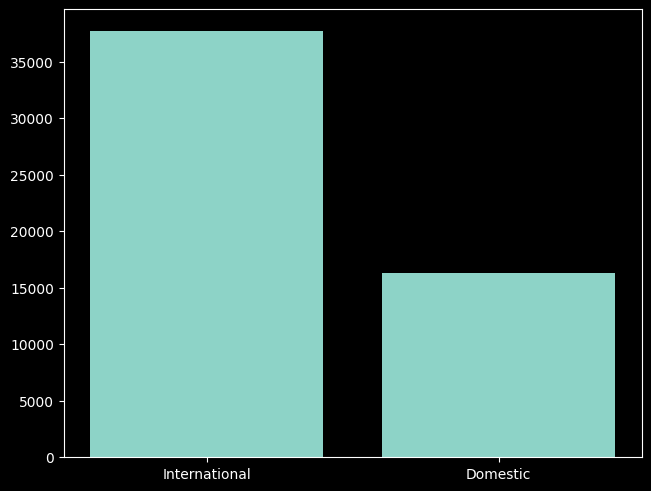

In [11]:
#make simple data visualization
fig, ax = plt.subplots(layout='constrained')
 
geo_summary = df.geo_summary.value_counts()

ax.bar(geo_summary.index, geo_summary.values)